# Inagural Project

In [156]:

import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject_MP as ip


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importing

In [157]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Defining parameters and functions 

In [158]:
alpha = 1/3 #alpha is the preference parameter for good 1
beta = 2/3 #beta is the preference parameter for good 2
N=75 
omega_A1 = 0.8 #omega_A1 is the initial endowment of good 1 for agent A
omega_A2 = 0.3 #omega_A2 is the initial endowment of good 2 for agent A
omega_B1 = 1-omega_A1 #omega_B1 is the initial endowment of good 1 for agent B
omega_B2 = 1-omega_A2 #omega_B2 is the initial endowment of good 2 for agent B
p2 = 1  # Numeraire price of good 2

# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha) #utility function of agent A

def uB(x1, x2):
    return x1**beta * x2**(1-beta) #utility function of agent B

#Demand functions 
def demand_A_x1(omega_A1, omega_A2, p1, alpha):
    return alpha*(p1*omega_A1 + p2*omega_A2)/p1 #demand function for good 1 for agent A

def demand_A_x2(omega_A1, omega_A2, p1, alpha):
    return (1-alpha)*(p1*omega_A1 + p2*omega_A2)/p2 #demand function for good 2 for agent A

def demand_B_x1(omega_B1, omega_B2, p1, beta):
    return beta*(p1*omega_B1 + p2*omega_B2)/p1 #demand function for good 1 for agent B

def demand_B_x2(omega_B1, omega_B2, p1, beta):
    return (1-beta)*(p1*omega_B1 + p2*omega_B2)/p2 #demand function for good 2 for agent B

# Walras market equilibrium clearing conditions
 # The sum of the demands for good 1 from agent A and agent B must equal the total supply of good 1
def market_clearing_x1(p1):
    total_demand_x_1= demand_A_x1(omega_A1, omega_A2, p1, alpha) + demand_B_x1(omega_B1, omega_B2, p1, beta)
    total_supply_x_1 = omega_A1 + omega_B1
    return total_demand_x_1 - total_supply_x_1

def market_clearing_x2(p1):
    total_demand_x_2= demand_A_x2(omega_A1, omega_A2, p1, alpha) + demand_B_x2(omega_B1, omega_B2, p1, beta)
    total_supply_x_2 = omega_A2 + omega_B2
    return total_demand_x_2 - total_supply_x_2

# Question 1
For question 1 we illustrate the given set in an Edgeworth box. That is we find the pairs of combinations of x_1^A and x_2^B that leave both players at least as well off as they were when consuming their endowments. This is thus Pareto improvements relative to the endowment.

0.41601676461038084
0.30365889718756617


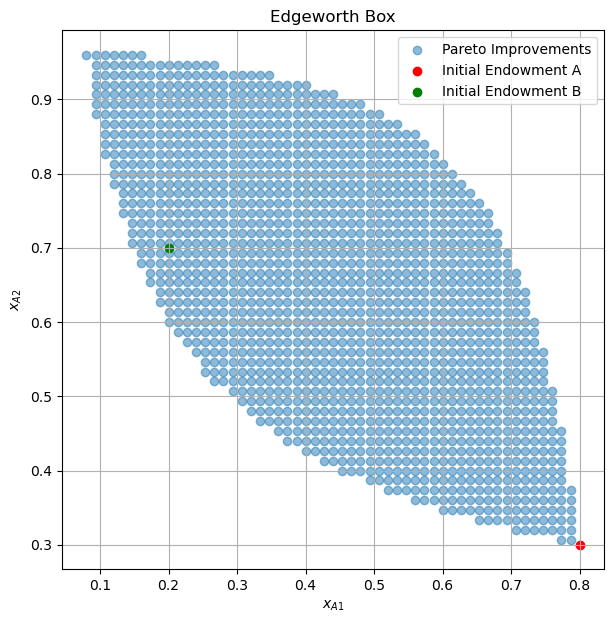

In [159]:
# Initial utilities
initial_uA = uA(omega_A1, omega_A2) #utility of agent A with initial endowment
initial_uB = uB(omega_B1, omega_B2) #utility of agent B with initial endowment

print(initial_uA)
print(initial_uB)

# Generating Pareto improvements
pareto_improvements = [] #list to store Pareto improvements
for xA1 in np.linspace(0, 1, N+1): #loop over all possible allocations of good 1 for agent A
    for xA2 in np.linspace(0, 1, N+1): #loop over all possible allocations of good 2 for agent A
        xB1 = 1 - xA1 #allocation of good 1 for agent B
        xB2 = 1 - xA2 #allocation of good 2 for agent B
        if uA(xA1, xA2) >= initial_uA and uB(xB1, xB2) >= initial_uB: #checking if the allocation is a Pareto improvement
            pareto_improvements.append((xA1, xA2)) #adding the allocation to the list of Pareto improvements

# Converting list of tuples to numpy array for plotting
pareto_improvements_np = np.array(pareto_improvements) 

# Plotting the Edgeworth Box
plt.figure(figsize=(7, 7)) #setting the size of the plot
plt.scatter(pareto_improvements_np[:, 0], pareto_improvements_np[:, 1], alpha=0.5, label='Pareto Improvements') 
plt.scatter([omega_A1], [omega_A2], color='red', label='Initial Endowment A') #plotting the initial endowment of agent A
plt.scatter([1-omega_A1], [1-omega_A2], color='green', label='Initial Endowment B') #plotting the initial endowment of agent B
plt.xlabel('$x_{A1}$') #setting the label of the x-axis
plt.ylabel('$x_{A2}$') #setting the label of the y-axis
plt.title('Edgeworth Box') #setting the title of the plot
plt.legend() #adding a legend to the plot
plt.grid(True) #adding a grid to the plot
plt.show() #displaying the plot

# Question 2
Now we calculate the error in the market clearing conditions for p1 in P1. That is we examine how far the market is from equilibrium for each price p_1 within P1


In [160]:
# Range of prices p1 to consider
N_p1 = 75 # Number of points in the grid
p1_values = np.linspace(0.5, 2.5, N_p1) 

# Calculate the errors in the market clearing conditions for p1 in P1
epsilon_1 = []
epsilon_2 = []

for p1 in p1_values:
    error_1 = market_clearing_x1(p1)
    error_2 = market_clearing_x2(p1)
    epsilon_1.append(error_1)
    epsilon_2.append(error_2)





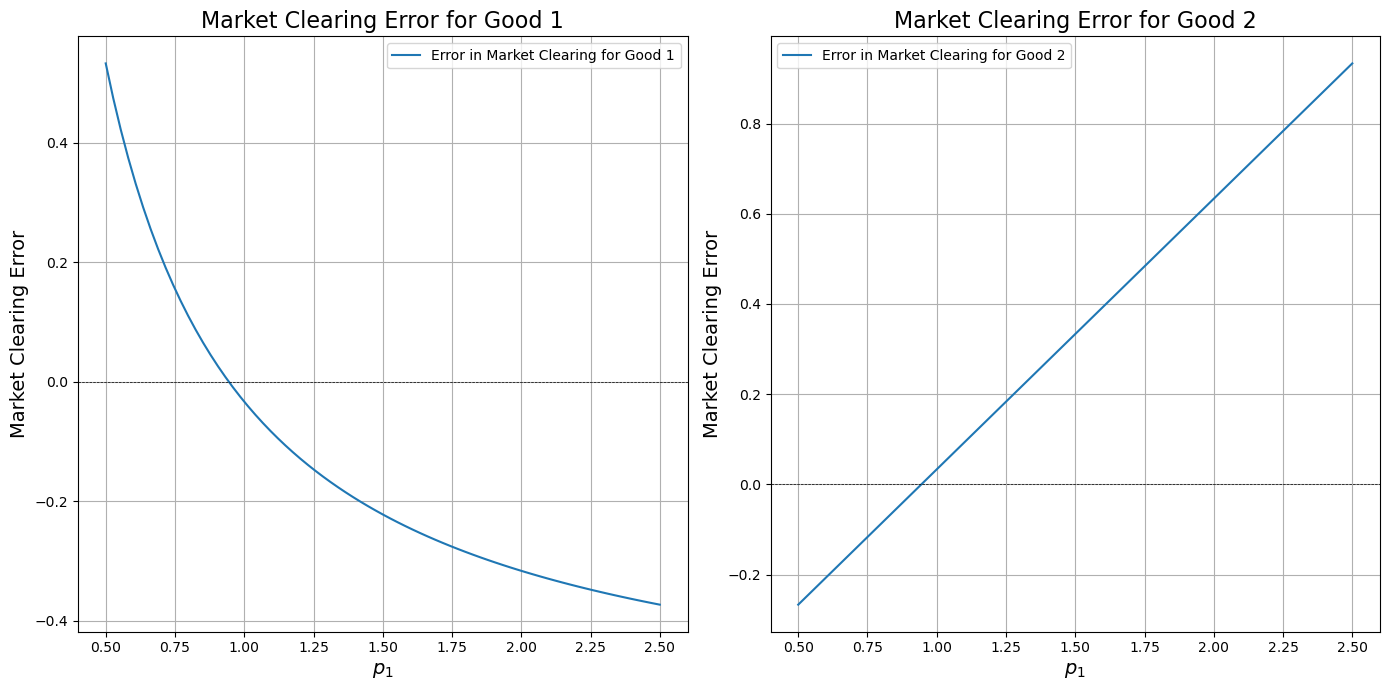

In [161]:
# Plotting the errors in market clearing conditions for good 1 and 2 as functions of p1
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(P1, epsilon_1, label='Error in Market Clearing for Good 1')
plt.xlabel('$p_1$', fontsize=14)
plt.ylabel('Market Clearing Error', fontsize=14)
plt.title('Market Clearing Error for Good 1', fontsize=16)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(P1, epsilon_2, label='Error in Market Clearing for Good 2')
plt.xlabel('$p_1$', fontsize=14)
plt.ylabel('Market Clearing Error', fontsize=14)
plt.title('Market Clearing Error for Good 2', fontsize=16)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Question 3
Now we find the market clearing price. We can find the market clearing price by analyzing the errors in the market clearing conditions and identify at which price the error is closest to 0. 

In [162]:
# Define the objective function
def objective(x):
    p1 = x[0]
    return abs(market_clearing_x1(p1))

# Initial guess for the solution
x0 = [1.0]

# Minimize the objective function
result = minimize(objective, x0)

# Get the optimal value of p1
optimal_p1 = result.x[0]

print("Optimal p1:", optimal_p1)




Optimal p1: 0.9444444400390792


In [163]:
# Calculate the optimal allocation of good 1 for agent A
optimal_xA1 = demand_A_x1(omega_A1, omega_A2, optimal_p1, alpha)
optimal_xA2 = demand_A_x2(omega_A1, omega_A2, optimal_p1, alpha)
optimal_xB1 = demand_B_x1(omega_B1, omega_B2, optimal_p1, beta)
optimal_xB2 = demand_B_x2(omega_B1, omega_B2, optimal_p1, beta)

#printing the optimal allocation of goods for agent A and agent B
print("Optimal allocation of good 1 for agent A:", optimal_xA1)
print("Optimal allocation of good 2 for agent A:", optimal_xA2)
print("Optimal allocation of good 1 for agent B:", optimal_xB1)
print("Optimal allocation of good 2 for agent B:", optimal_xB2)

Optimal allocation of good 1 for agent A: 0.37254902010173185
Optimal allocation of good 2 for agent A: 0.7037037013541757
Optimal allocation of good 1 for agent B: 0.6274509826969706
Optimal allocation of good 2 for agent B: 0.29629629600260526


# Question 4
We now Assume that A chooses the price to maximize her own utilty. First when the price has the be within P1 (4.a) after secondly when any positive price an be chosen (4.b) We assume that A chooses B's consumption, but such taht B is not worse of than in the initial endowment. A is thus market maker

In [172]:
a4_max_utility=0
a4_optimal_p1=0

for p1 in p1_values:
    xA1 = demand_A_x1(omega_A1, omega_A2, p1, alpha)
    xA2 = demand_A_x2(omega_A1, omega_A2, p1, alpha)
    xB1 = demand_B_x1(omega_B1, omega_B2, p1, beta)
    xB2 = demand_B_x2(omega_B1, omega_B2, p1, beta)
    utility_A = uA(xA1, xA2)
    utility_B = uB(xB1, xB2)
    if 0<=xA1<=1 and 0<=xA2<=1 and 0<=xB1<=1 and 0<=xB2<=1:
        if utility_A > a4_max_utility and utility_B > initial_uB:
            a4_max_utility = utility_A
            a4_optimal_p1 = p1

print("Optimal p1 for agent A4:", a4_optimal_p1, "with utility:", a4_max_utility)
print("allocation of good 1 for agent A4:", demand_A_x1(omega_A1, omega_A2, a4_optimal_p1, alpha), "allocation of good 2 for agent A4:", demand_A_x2(omega_A1, omega_A2, a4_optimal_p1, alpha))
print("allocation of good 1 for agent B4:", demand_B_x1(omega_B1, omega_B2, a4_optimal_p1, beta), "allocation of good 2 for agent B4:", demand_B_x2(omega_B1, omega_B2, a4_optimal_p1, beta))

print('Problem Allocation of good is greater than 1!') 

Optimal p1 for agent A4: 1.472972972972973 with utility: 0.6875211855852789
allocation of good 1 for agent A4: 0.33455657492354746 allocation of good 2 for agent A4: 0.9855855855855858
allocation of good 1 for agent B4: 0.45015290519877665 allocation of good 2 for agent B4: 0.33153153153153153
Problem Allocation of good is greater than 1!


In [175]:
from scipy.optimize import minimize_scalar

# Objective function for maximizing A's utility given p1, with explicit market-clearing constraints
def utility_A_for_p1(p1):
    if p1 <= 0:  # Prevent non-positive prices
        return -np.inf
    xA1 = demand_A_x1(omega_A1, omega_A2, p1, alpha)
    xA2 = demand_A_x2(omega_A1, omega_A2, p1, alpha)
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    if xA1 + xB1 > 1 or xA2 + xB2 > 1:  # Ensure allocations do not exceed total supply
        return -np.inf
    return -uA(xA1, xA2)  # Negative utility for maximization

# Minimize the negative utility to find optimal p1
result_4b = minimize_scalar(lambda p1: utility_A_for_p1(p1), bounds=(0, 5), method='bounded')
optimal_p1_4b = result_4b.x
optimal_utility_4b = -result_4b.fun

print(f"Optimal p1 (any positive price): {optimal_p1_4b}, Optimal Utility: {optimal_utility_4b}")
#Allocation of goods for agent A and agent B
optimal_xA1_4b = demand_A_x1(omega_A1, omega_A2, optimal_p1_4b, alpha)
optimal_xA2_4b = demand_A_x2(omega_A1, omega_A2, optimal_p1_4b, alpha)
optimal_xB1_4b = demand_B_x1(omega_B1, omega_B2, optimal_p1_4b, beta)
optimal_xB2_4b = demand_B_x2(omega_B1, omega_B2, optimal_p1_4b, beta)
print("Optimal allocation of good 1 for agent A:", optimal_xA1_4b)
print("Optimal allocation of good 2 for agent A:", optimal_xA2_4b)
print("Optimal allocation of good 1 for agent B:", optimal_xB1_4b)
print("Optimal allocation of good 2 for agent B:", optimal_xB2_4b)

print('Something is wrong! Allocation of good is greater than 1!')

Optimal p1 (any positive price): 4.999996371653228, Optimal Utility: 1.3305882226224344
Optimal allocation of good 1 for agent A: 0.2866666811800643
Optimal allocation of good 2 for agent A: 2.8666647315483886
Optimal allocation of good 1 for agent B: 0.22666673439585555
Optimal allocation of good 2 for agent B: 0.5666664247768819
Something is wrong! Allocation of good is greater than 1!


# Question 5
Now we find the allocation if choice set is restricted to C. That is the choice set has to be Pareto efficient 

In [180]:
max_utility_A = -np.inf
optimal_allocation_A = None

for allocation in pareto_improvements:
    xA1, xA2 = allocation
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    utility_A = uA(xA1, xA2)
    utility_B = uB(xB1, xB2)
    if utility_A > max_utility_A and utility_B > initial_uB:
        max_utility_A = utility_A
        optimal_allocation_A = allocation

optimal_xA1_4c, optimal_xA2_4c = optimal_allocation_A
print(f"Optimal Allocation for A: xA1 = {optimal_xA1_4c}, xA2 = {optimal_xA2_4c}")
optimal_xB1_4c = 1 - optimal_xA1_4c
optimal_xB2_4c = 1 - optimal_xA2_4c
print(f"Optimal Allocation for B: xB1 = {optimal_xB1_4c}, xB2 = {optimal_xB2_4c}")

# optimal utility for agent A
optimal_utility_A_4c = uA(optimal_xA1_4c, optimal_xA2_4c)
print(f"Optimal Utility for A: {optimal_utility_A_4c}")

print('Allocation seems feasible since it is within the points in the Edgeworth Box!')

Optimal Allocation for A: xA1 = 0.56, xA2 = 0.8533333333333334
Optimal Allocation for B: xB1 = 0.43999999999999995, xB2 = 0.1466666666666666
Optimal Utility for A: 0.7415523509091093
Allocation seems feasible since it is within the points in the Edgeworth Box!


In [194]:
from scipy.optimize import minimize

# Constraint for Agent B's utility
def constraint_B_utility(x):
    xA1, xA2 = x[0], x[1]
    xB1, xB2 = 1 - xA1, 1 - xA2  # Since the total endowments for both goods are 1
    return uB(xB1, xB2) - initial_uB

# Objective function for optimization (negative utility for minimization)
def objective(x):
    return -uA(x[0], x[1])

# Initial guess (start from the initial endowment of A)
initial_guess = [omega_A1, omega_A2]

# Define the constraints and bounds
constraints = ({'type': 'ineq', 'fun': constraint_B_utility})
bounds = [(0, 1), (0, 1)]  # xA1 and xA2 must be between 0 and 1

# Perform the optimization
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal allocations and utility
if result.success:
    optimal_xA1, optimal_xA2 = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal allocations for Agent A: xA1 = {optimal_xA1:.4f}, xA2 = {optimal_xA2:.4f}")
    print(f"Optimal Utility for Agent A: {optimal_utility_A:.4f}")
else:
    print("Optimization was unsuccessful. Please check the constraints and objective function.")

# Calculate the optimal allocations for Agent B
optimal_xB1 = 1 - optimal_xA1
optimal_xB2 = 1 - optimal_xA2
print(f"Optimal allocations for Agent B: xB1 = {optimal_xB1:.4f}, xB2 = {optimal_xB2:.4f}")
#utility for agent B
utility_B = uB(optimal_xB1, optimal_xB2)
print(f"Utility for Agent B: {utility_B:.4f}")
initial_uB = uB(omega_B1, omega_B2)
print(f"Initial Utility for Agent B: {initial_uB:.4f}")

print('Allocation  feasable since initial utility for B is the same...')

Optimal allocations for Agent A: xA1 = 0.5363, xA2 = 0.6981
Optimal Utility for Agent A: 0.6394
Optimal allocations for Agent B: xB1 = 0.4637, xB2 = 0.3019
Utility for Agent B: 0.3742
Initial Utility for Agent B: 0.3742
Allocation  feasable since initial utility for B is the same...


# Question 6